<a href="https://colab.research.google.com/github/mohamedhossam23/Python/blob/main/Heart_disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("heart-disease.csv")

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


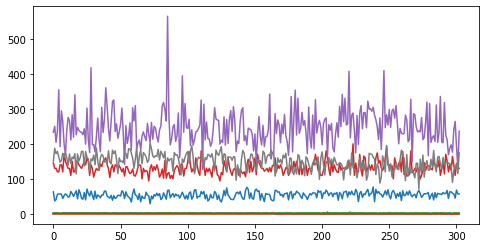

In [64]:
plt.figure(figsize=(8,4))
plt.title("Heart Disease")
plt.xlabel("x-lable")
plt.ylabel("y-lable")

plt.plot(data)
plt.show()

In [3]:
x = data.drop("target", axis =1)
y = data["target"]

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [5]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2


In [8]:
y_train

223    0
256    0
162    1
207    0
62     1
      ..
71     1
122    1
21     1
10     1
288    0
Name: target, Length: 242, dtype: int64

In [9]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [10]:
clf.score(x_train,y_train)

1.0

In [11]:
clf.score(x_test,y_test)

0.8032786885245902

In [12]:
np.random.seed(42)

for i in range(10,100,10):
  print(f"trying model with {i} estimators..")
  clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
  print(f"model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")

trying model with 10 estimators..
model accuracy on test set: 78.69%
trying model with 20 estimators..
model accuracy on test set: 77.05%
trying model with 30 estimators..
model accuracy on test set: 81.97%
trying model with 40 estimators..
model accuracy on test set: 77.05%
trying model with 50 estimators..
model accuracy on test set: 80.33%
trying model with 60 estimators..
model accuracy on test set: 81.97%
trying model with 70 estimators..
model accuracy on test set: 80.33%
trying model with 80 estimators..
model accuracy on test set: 80.33%
trying model with 90 estimators..
model accuracy on test set: 78.69%


In [13]:
import pickle
pickle.dump(clf,open("random fprst_model_1.pkl","wb"))